# Data Cleaning, Preparation, Exploration and Visualization in GCP

This notebook cleans and analyzes data and that data is in turn used to produce a report/dashboard that reviews insurance claims against US airports.

In [1]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Loading the dataset into a Pandas DataFrame
df= pd.read_csv("../Downloads/claimsfile.csv")

C:\Users\narae\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
#Examining the first 5 rows of the Dataset to understand the type Data that is present in it
df.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full


## Preprocessing and cleaning the dataset

In [6]:
# Deleting rows with duplicate values
df.drop_duplicates(inplace=True)


In [7]:
# Checking all the null values in each column
df.isnull().sum()

Claim Number         0
Date Received      263
Incident Date     2183
Airport Code      8523
Airport Name      8523
Airline Name     34373
Claim Type        7913
Claim Site         740
Item              3966
Claim Amount      4043
Status               5
Close Amount     68951
Disposition      72907
dtype: int64

In [8]:
# Deleting rows with 2 or more null values in them
df.dropna(axis=0,thresh=2,inplace=True)

In [9]:
# Replacing all the values with "-" in the dataset with NaN values to make it easier.
df=df.replace('^-',np.nan,regex=True)

In [10]:
# Total Nan values
df.isnull().sum().sum()

247944

In [11]:
df.columns

Index(['Claim Number', 'Date Received', 'Incident Date', 'Airport Code',
       'Airport Name', 'Airline Name', 'Claim Type', 'Claim Site', 'Item',
       'Claim Amount', 'Status', 'Close Amount', 'Disposition'],
      dtype='object')

In the below cell, we replace the null values with appropriate replacemnet values. For **dates**, we replaced with the values from the previous row. Doing this will not affect the dataset as we have relatively much lower number of null values in them. For the **airport code,airport name,airline name, claim type, claim site, item, status columns**, we replace the Nan values with "Unknown". When we examine the dataset, which is quite messy, the empty rows are present only if they were unsure why their claim was cancelled or revoked. Hence, we put "Unknown". The values "denied","settled", "approved" are only present if they were denied, settled or approved respectively. There is no ambiguity there. The rest either have been left empty or have " - " values in them.  The Disposition Nan values have been replaced with "Cancelled" as they have only been left empty if the status was not approved, denied or settled. So irrespective of what actually happened, we can assume they were cancelled

In [12]:
df['Date Received'].fillna(method='ffill', inplace=True)
df['Incident Date'].fillna(method='ffill', inplace=True)
df['Incident Date'].fillna(method='ffill', inplace=True)
df['Airport Code'].fillna('Unknown value',inplace=True)
df['Airport Name'].fillna("Unknown",inplace=True)
df['Airline Name'].fillna("Unknown",inplace=True)
df['Claim Type'].fillna("Unknown",inplace=True)
df['Claim Site'].fillna("Unknown",inplace=True)
df['Item'].fillna("Unknown",inplace=True)
df['Claim Amount'].fillna(0.00,inplace=True)
df['Close Amount'].fillna(0.00,inplace=True)
df['Disposition'].fillna("Cancelled",inplace=True)
df["Status"].fillna("Unknown",inplace=True)

In [13]:
df.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,Unknown,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full


In [14]:

df.tail()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
204262,2015120427297,20-Nov-15,16-Oct-15,Unknown value,Unknown,Unknown,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,0.0,Unknown,0.0,Cancelled
204263,2015123027969,17-Dec-15,2-Dec-15,Unknown value,Unknown,Unknown,Property Damage,Checked Baggage,Audio/Video; Home Decor,0.0,Unknown,0.0,Cancelled
204264,2016010428072,22-Dec-15,20-Dec-15,Unknown value,Unknown,Unknown,Passenger Property Loss,Checked Baggage,Clothing,0.0,Unknown,0.0,Cancelled
204265,2016011328300,30-Dec-15,28-Dec-15,Unknown value,Unknown,Unknown,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,0.0,Unknown,0.0,Cancelled
204266,2015123128015,31-Dec-15,23-Nov-15,Unknown value,Unknown,Unknown,Passenger Property Loss,Checkpoint,Personal Accessories,0.0,Unknown,0.0,Cancelled


In [15]:
# Handling special characters in the cells. For example, $ or ; in the amount columns

df=df.replace('\$|;|,','',regex=True).astype(str)
df['Claim Amount']=df['Claim Amount'].replace('nan','0.00',regex=True).astype(str)
df.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approved,350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,Unknown,Property Damage,Checked Baggage,Luggage (all types including footlockers),100.00,Settled,50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settled,227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers car seats playpen etc.,84.79,Approved,84.79,Approve in Full


In [31]:
# Converting amounts to float and date values to datetime

df=df.astype({'Claim Amount':float, 'Close Amount':float})
df['Incident Date']=pd.to_datetime(df['Incident Date'],errors = 'coerce')
df['Date Received']=pd.to_datetime(df['Date Received'],errors = 'coerce')

In [32]:
type(df['Incident Date'].values[0])

numpy.datetime64

In [33]:
type(df['Date Received'].values[0])

numpy.datetime64

In [17]:
df.describe()

,Claim Amount,Close Amount
count,2.042610e+05,204261.00000
mean,1.477336e+07,65.11558
std,6.637890e+09,754.98190
min,0.000000e+00,0.00000
25%,1.095000e+01,0.00000
50%,9.842000e+01,0.00000
75%,3.090000e+02,30.00000
max,3.000000e+12,250000.00000


In [18]:
closeamt_array=df['Close Amount'].to_numpy()
closeamt_array

array([350.  ,  50.  , 227.92, ...,   0.  ,   0.  ,   0.  ])

In [19]:
##1. What is the most common type of insurance claim?
import statistics
from statistics import mode
a=df['Claim Type'].to_list()
print(mode(a))

Passenger Property Loss


In [20]:
##2. Which claim site within the airport are claims most commonly filed for?
a=df['Claim Site'].to_list()
print(mode(a))

Checked Baggage


In [21]:
##3. What type of claim is made most at each claim site?
a=df['Claim Type']
a.index=df['Claim Site']
print(mode(a['Checkpoint']))
print(mode(a['Checked Baggage']))
print(mode(a['Motor Vehicle']))
print(mode(a['Bus Station']))

Property Damage
Passenger Property Loss
Motor Vehicle
Passenger Property Loss


In [22]:
##4. What is the typical claim amount?
from collections import Counter
counted_list= Counter(list(df['Claim Amount']))
top_claim_amts=counted_list.most_common(3)
top_claim_amts

[(0.0, 45235), (100.0, 3871), (50.0, 3460)]

In [23]:
##5. What is the overall claim approval rate for the entire U.S.?

a=df['Status'].to_list()
a.count('Approved')/len(a)

0.17134450531427928

In [24]:
##6. If a claim is approved or settled, what percent of the claim amount do the airports pay?
new_list = list(zip(df.loc[:]['Close Amount'], df.loc[:]["Status"],df.loc[:]["Claim Amount"]))


Here, we take the total of the claim amount when the status is approved or settled. To get the amount that the airport pays, we subtract the close amount from the claim amount as the airport pays the difference. Then we take the percentage of it.

In [27]:
total_claim=0
paid_by_airport=0
for cls_amt,status,clm in new_list:
    if status=="Approved" or status=="Settled":
        total_claim+=clm
        paid_by_airport+=clm-cls_amt

In [28]:
(paid_by_airport/total_claim)*100

55.89950510373774

In [29]:
##7. What are the five airports with the most claims?
df['Airport Name'].value_counts().head(6)

John F. Kennedy International           9232
Unknown                                 8959
Los Angeles International Airport       7260
Newark International Airport            6866
Chicago O'Hare International Airport    6843
Miami International Airport             6432
Name: Airport Name, dtype: int64

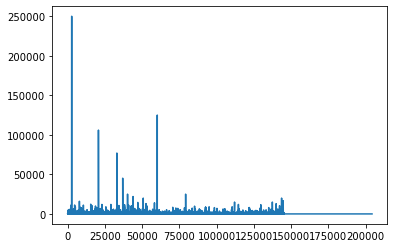

In [30]:
##8. Has the total close amount increased or decreased over time?
plt.plot(np.array(df["Close Amount"].index), closeamt_array)
plt.show()

When we look at the graph, we can see that the **close amount decreases over time**. How can we say that when we did not plot it using the dates or using time series analysis? When we look at the data, we can see that the claim dates are arranged in order from the year 2002 to 2015.